       STATION                     NAME        DATE  DAPR  MDPR  PRCP  SNOW  \
0  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-01   NaN   NaN  0.00   0.0   
1  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-02   NaN   NaN  0.00   0.0   
2  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-03   NaN   NaN  0.00   0.0   
3  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-04   NaN   NaN  0.00   0.0   
4  US1MECM0018  PORTLAND 5.5 WNW, ME US  2018-01-05   NaN   NaN  1.03  10.3   

   SNWD  
0  12.0  
1  12.0  
2  11.0  
3  11.0  
4  18.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1789 non-null   object 
 1   NAME     1789 non-null   object 
 2   DATE     1789 non-null   object 
 3   DAPR     12 non-null     float64
 4   MDPR     12 non-null     float64
 5   PRCP     1773 non-null   float64
 6   SNOW     1777 non-null   float64
 7   SNWD     153

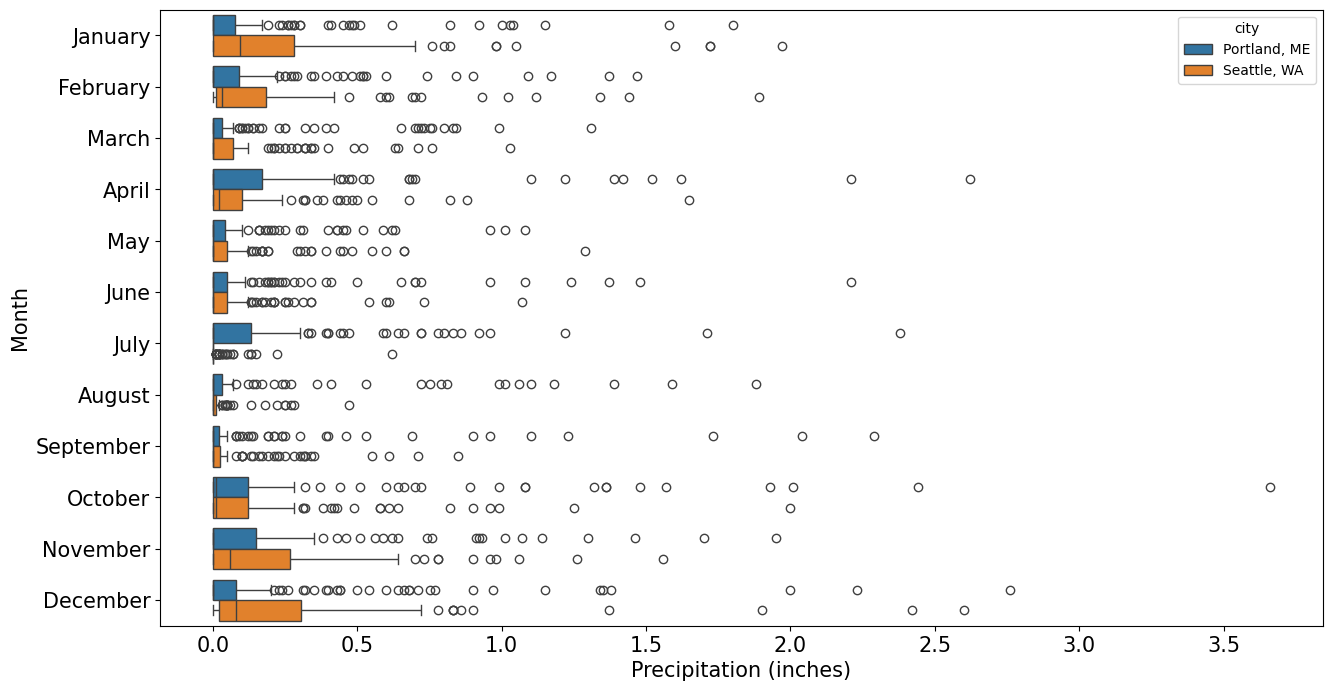

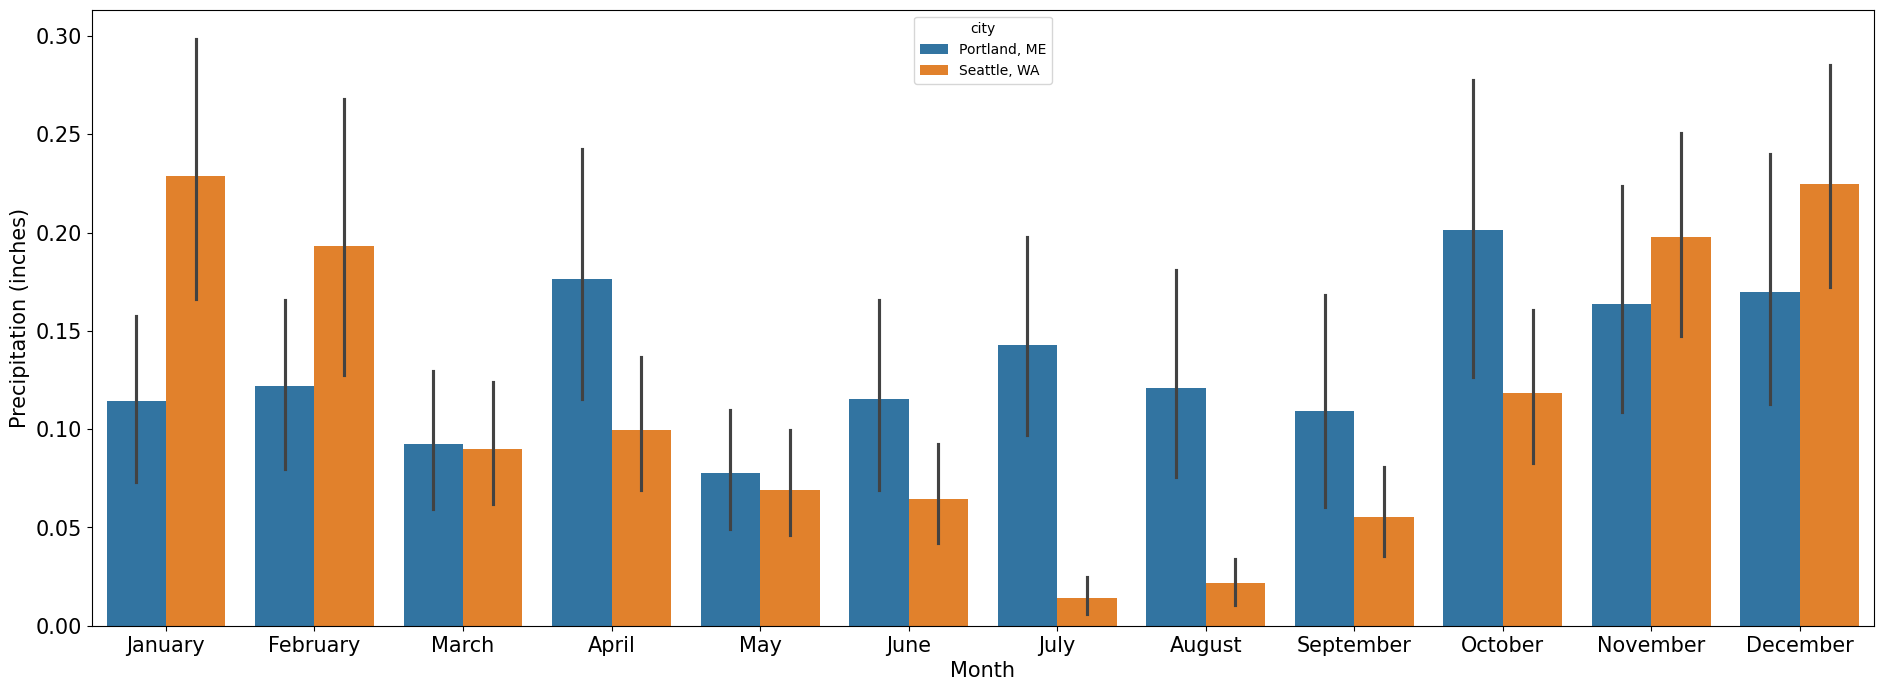

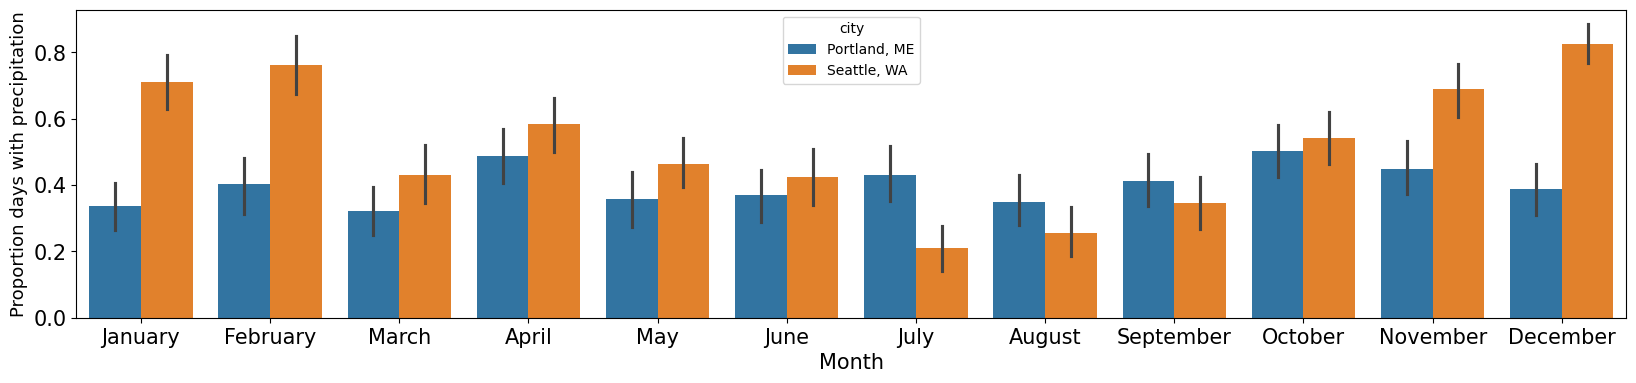

In [ ]:
# This is an analysis of whether it rains more in Seattle, WA or Portland, ME. 
## All data was sourced from the National Centers for Environmental Information NOAA Climate Data search tool
## https://www.ncdc.noaa.gov/cdo-web/search

# Importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Cleaning the Portland weather dataset
### Loading Portland weather dataset
por_url = "https://raw.githubusercontent.com/carolinebuske/Weather/refs/heads/main/weather/data/portland_rain.csv"
por_df = pd.read_csv(por_url)

### Inspecting Portland dataset
print(por_df.head())
print(por_df.info())
print(por_df.describe())
print(por_df.isnull().sum())
### We now have a summary of the Portland data, including any null values.

### Dropping unnecessary columns
por_df = por_df.drop(["DAPR","MDPR","SNOW","SNWD","STATION","NAME"],axis=1)
### We are left with only date and precipitation values

### Dropping rows with missing values
por_df = por_df.dropna()

### Catching non-numeric precipitation entries
por_df["PRCP"] = pd.to_numeric(por_df["PRCP"],errors="coerce")
por_bad_rows = por_df[por_df["PRCP"].isna()]
print(por_bad_rows)

### Dropping duplicate entries
por_df = por_df.drop_duplicates()

# Cleaning the Seattle weather dataset
### Loading the Seattle weather dataset
sea_url = "https://raw.githubusercontent.com/carolinebuske/Weather/refs/heads/main/weather/data/seattle_rain.csv"
sea_df = pd.read_csv(sea_url)

### Inspecting the Seattle weather dataset
print(sea_df.head())
print(sea_df.info())
print(sea_df.describe())
print(sea_df.isnull().sum())
### We now have a summary of the Seattle data, including any null values.

### Dropping unnecessary columns
sea_df = sea_df.drop(["DAPR","MDPR","SNOW","SNWD","WESD","WESF","STATION","NAME"],axis=1)
### We are left only with date and precipitation values

### Dropping rows with missing values
sea_df = sea_df.dropna()

### Catching non-numeric entries
sea_df["PRCP"] = pd.to_numeric(sea_df["PRCP"],errors="coerce")
sea_bad_rows = sea_df[sea_df["PRCP"].isna()]
print(sea_bad_rows)

### Dropping duplicate entries
sea_df = sea_df.drop_duplicates()

# Formatting dates
sea_df["DATE"] = pd.to_datetime(sea_df["DATE"], format="%m/%d/%y", errors="coerce")
por_df["DATE"] = pd.to_datetime(por_df["DATE"], errors="coerce")
### Now, all dates can be iterated through so we can drop any outside of our desired timeframe

# Merging the two datasets
por_df["city"] = "Portland, ME"
sea_df["city"] = "Seattle, WA"
weather = pd.concat([por_df, sea_df], ignore_index=True)

## Renaming columns to improve readability
weather = weather.rename(columns={"PRCP":"precipitation"})
weather = weather.rename(columns={"DATE":"date"})

## Filtering out entries out of date range
start_date = "2018-01-01"
end_date = "2022-12-31"
weather = weather[(weather["date"] >= start_date) & (weather["date"] <= end_date)]
### Any entries not between the two specified dates have been removed

# Finding descriptive statistics
summary = weather.groupby('city')['precipitation'].describe()
print(summary.to_string())
### We now have a summary table of count, mean, standard deviation, percentiles, and min/max.
### Portland has a higher mean rainfall, as well as a higher standard deviation.

# Making a box plot of precipitation by month
### We are trying to find whether the average rainfall is higher in Portland or Seattle by month, and find outliers.
weather['month'] = pd.DatetimeIndex(weather['date']).month
plt.figure(figsize=(15,8))
sns.boxplot(data=weather, x='precipitation', y='month', hue='city', orient='h')
plt.xlabel('Precipitation (inches)',fontsize=15)
plt.ylabel('Month', fontsize=15)
plt.tick_params(labelsize=15)
### The box plot shows us that Seattle tends to get more rain in the colder months, and Portland in the warmer months.
### Portland has larger outliers in the data, with one notably high point in October. This could skew the mean.

### Adding month names
import calendar
month_names = list(calendar.month_name[1:])
plt.yticks(ticks=range(12), labels=month_names)
plt.show()
### Now all of our graphs will include the appropriate month names

# Making a bar graph of precipitation by month
### We are trying to find whether the average rainfall is higher in Portland or Seattle by month.
plt.figure(figsize=(23,8))
sns.barplot(data=weather, x='month',y='precipitation', hue='city')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.show()
### The graph once again shows us that Seattle has greater average rainfall in the colder months, and Portland in the warmer months.
### Portland error bars tend to be longer, indicating greater variability and uncertainty regarding the true mean.

# Making a bar graph of proportion of days that received precipitation per month
### We are trying to find out whether Seattle or Portland has more rainy days in each month.
weather['any_precipitation'] = weather['precipitation'] > 0
plt.figure(figsize=(20,4))
sns.barplot(data=weather, x='month',y='any_precipitation', hue='city')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.show()
### The graph shows us that for all months except for July, August, and September, Seattle has a higher proportion of days with rain.
### This indicates a dry season for Seattle, whereas Portland doesn't have as strong of a seasonal pattern.

# Overall, it rains more in Portland, ME, than Seattle, WA.